# Визуализация данных

Поговорим о проекте Тинькофф Квест.
Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.

В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.

В приложенном файле таблица со следующими полями:

* client_id -- id клиента, зарегистрированного на сайте
* birth_dt -- дата его рождения
* reg_dttm -- дата и время регистрации на сайте данного клиента
* purchase_id -- id покупки
* purchase_dt -- дата покупки
* purchase_amt -- сумма покупки

Если данные по покупке пустые -- клиент не совершил утилизации.

## Задание 2

Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.
В ответ пришлите изображение диаграммы (или графика) и код (SQL/Python), с помощью которого вы его получили

In [53]:
!wget https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls

--2021-03-29 07:11:04--  https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls
Resolving edu.tinkoff.ru (edu.tinkoff.ru)... 178.248.239.60
Connecting to edu.tinkoff.ru (edu.tinkoff.ru)|178.248.239.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120187 (117K) [binary/octet-stream]
Saving to: ‘40efea85-f221-4233-b218-87ae35423650.xls.2’

40efea85-f221-4233- 100%[===================>] 117.37K   295KB/s    in 0.4s    

2021-03-29 07:11:05 (295 KB/s) - ‘40efea85-f221-4233-b218-87ae35423650.xls.2’ saved [120187/120187]



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/40efea85-f221-4233-b218-87ae35423650.xls')
print(df.columns.values)

['client_id' 'birth_dt' 'reg_dttm' 'purchase_id' 'purchase_dt'
 'purchase_amt']


In [55]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [56]:
#data transformation
df['birth_dt'] = df['birth_dt'].dt.strftime('%Y')
df['reg_dttm'] = df['reg_dttm'].dt.strftime('%Y-%m')

#add new columns
df['age'] = 2019 - df['birth_dt'].astype(int)
df['util'] = ((pd.isnull(df.purchase_id)) == False).astype(int) # we choose int type to simplify the summation
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age,util
0,820519,1990,2019-01,NaN,NaT,NaN,29,0
1,820521,1970,2019-01,NaN,NaT,NaN,49,0
2,820523,1991,2019-01,1.204926e+09,2019-02-12,500.0,28,1
3,820526,1985,2019-01,NaN,NaT,NaN,34,0
4,820544,1991,2019-01,NaN,NaT,NaN,28,0
...,...,...,...,...,...,...,...,...
2372,835630,1991,2019-04,NaN,NaT,NaN,28,0
2373,835634,1991,2019-04,1.299279e+09,2019-04-07,4000.0,28,1
2374,835650,1993,2019-04,1.299387e+09,2019-04-08,1500.0,26,1
2375,835666,1998,2019-04,NaN,NaT,NaN,21,0


Оставим только нужные для построения данные

In [57]:
df_upt = df.groupby(['client_id','age', 'util'], as_index=False)[['reg_dttm']].count()
data = df_upt.groupby(['age', 'util'], as_index=False)[['client_id']].count()

data.rename(columns={'client_id': 'count'}, inplace=True)
data

,age,util,count
0,18,0,14
1,18,1,14
2,19,0,82
3,19,1,107
4,20,0,73
...,...,...,...
91,66,0,1
92,66,1,1
93,67,1,1
94,68,1,1


In [58]:
age_data = ['18-25', '26-35', '36-45', '46-54', '55+'] #change the range for correct summation
count = []

def add_func(result, mydf, column):
  temp = mydf[(column >= 18)&(column <= 25)&(mydf.util == 1)]['count'].sum()
  temp /= mydf[(column >= 18)&(column <= 25)]['count'].sum()
  result.append(round(temp*100))
  
  temp = mydf[(column >= 26)&(column <= 35)&(mydf.util == 1)]['count'].sum()
  temp /= mydf[(column >= 26)&(column <= 35)]['count'].sum()
  result.append(round(temp*100))

  temp = mydf[(column >= 36)&(column <= 45)&(mydf.util == 1)]['count'].sum()
  temp /= mydf[(column >= 36)&(column <= 45)]['count'].sum()
  result.append(round(temp*100))

  temp = mydf[(column >= 46)&(column < 55)&(mydf.util == 1)]['count'].sum()
  temp /= mydf[(column >= 46)&(column < 55)]['count'].sum()
  result.append(round(temp*100))

  temp = mydf[(column >= 55)&(mydf.util == 1)]['count'].sum()
  temp /= mydf[column >= 55]['count'].sum()
  result.append(round(temp*100))
  return result

count = add_func(count, data, data.age)
data = pd.DataFrame({'Age': age_data, 'Util percentage': count})
data

,Age,Util percentage
0,18-25,48
1,26-35,44
2,36-45,41
3,46-54,53
4,55+,41


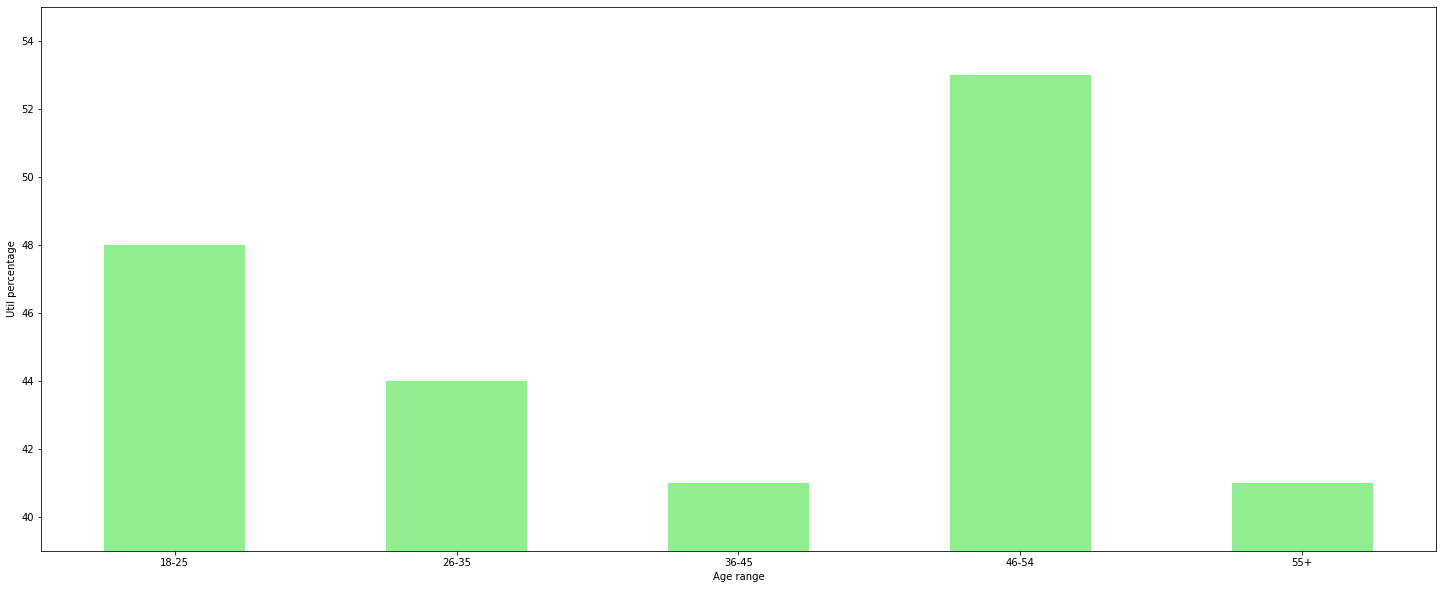

In [60]:
plt.figure(figsize = (25,10))

plt.bar(data['Age'] , data['Util percentage'], color = 'lightgreen', width=0.5, align='center')

plt.ylim(data['Util percentage'].min() - 2, data['Util percentage'].max() + 2)
plt.xlabel('Age range')
plt.ylabel('Util percentage')

plt.savefig('task2.png', dpi = 100)
plt.show()